In [163]:
import pandas as pd
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [31]:
# Open the excel file as an object
xlsfile = pd.ExcelFile('top100.xlsx', header=None)

In [ ]:
# Далее работаем с файлом, как с DataFrame!!!

In [32]:
dframe = xlsfile.parse(header=None)

In [ ]:
# Заголовок состоит из номеров колонок

In [33]:
dframe.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           dtype='int64')

In [34]:
# Для отладки выводим первые три строки из DataFrame

In [206]:
dframe.head(3)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Datetime
0,Twitch.tv/Vroksnak,174733177,76561198134998905,2017746055,Lycan,Melee,Strength,Carry,NaN,NaN,...,4,10,necronomicon-level-3,solar-crest,vladmirs-offering,heavens-halberd,boots-of-speed,empty,empty,2015-12-20
1,BimBam,7600495,76561197967866223,1000016533,Disruptor,Ranged,Intelligence,NaN,Disabler,Initiator,...,8,36,veil-of-discord,blink-dagger,euls-scepter-of-divinity,boots-of-travel,ultimate-orb,aghanims-scepter,empty,2014-11-02
2,Im done,167457267,76561198127722995,1000019587,Slark,Melee,Agility,Carry,Disabler,NaN,...,4,7,orchid-malevolence,shadow-blade,eye-of-skadi,power-treads,maelstrom,mask-of-madness,empty,2014-11-02


In [51]:
# Проверяем, что верно определены типы данных (последняя колонка - datetime)

In [67]:
dframe.dtypes

0                   object
1                    int64
2                    int64
3                    int64
4                   object
5                   object
6                   object
7                   object
8                   object
9                   object
10                  object
11                  object
12                  object
13                  object
14                  object
15                  object
16                  object
17                  object
18                  object
19                  object
20                   int64
21                   int64
22                   int64
23                  object
24                  object
25                  object
26                  object
27                  object
28                  object
29                  object
Datetime    datetime64[ns]
dtype: object

In [68]:
# Переименуем последний столбец, так как он в дальнейшем будет индексом

In [69]:
dframe = dframe.rename(columns={30: 'Datetime'})

In [70]:
#Отбираем id игроков

In [256]:
players = dframe[1].unique()
len(players)

64

In [257]:
# Отбираем игры конкретного игрока, для примера

In [258]:
player_match = dframe[dframe[1] == players[0]]

In [259]:
# Смотрим количество игр игрока

In [260]:
len(player_match)

556

In [261]:
# Формируем периоды по месяцам и подсчитываем число игр в каждом месяце

In [262]:
# группирует игры по месяцам и в итоге выдает общую сумму. То есть проверяем, что общая сумма равна числу игр на всякий случай

In [263]:
# player_match.set_index('Datetime').groupby(pd.TimeGrouper('M'))[0].apply(lambda x: x.count()).sum()

In [264]:
# кол-во игр по месяцам 

In [265]:
player_match.set_index('Datetime').groupby(pd.TimeGrouper('M'))[0].apply(lambda x: x.count())

Datetime
2014-04-30     14
2014-05-31    101
2014-06-30     16
2014-07-31     55
2014-08-31      0
2014-09-30      2
2014-10-31      0
2014-11-30      0
2014-12-31    128
2015-01-31    137
2015-02-28     14
2015-03-31     12
2015-04-30     60
2015-05-31      2
2015-06-30      2
2015-07-31      3
2015-08-31      3
2015-09-30      2
2015-10-31      2
2015-11-30      2
2015-12-31      1
Name: 0, dtype: int64

In [266]:
# количество уникальных героев (колонка 4 [4]), которых выбрал игрок в каждом периоде

In [267]:
player_match.set_index('Datetime').groupby(pd.TimeGrouper('M'))[4].apply(lambda x: len(x.unique()))

Datetime
2014-04-30     7
2014-05-31    36
2014-06-30    13
2014-07-31    18
2014-08-31     0
2014-09-30     1
2014-10-31     0
2014-11-30     0
2014-12-31    32
2015-01-31    38
2015-02-28    10
2015-03-31    10
2015-04-30    23
2015-05-31     2
2015-06-30     2
2015-07-31     3
2015-08-31     2
2015-09-30     2
2015-10-31     2
2015-11-30     2
2015-12-31     1
Name: 4, dtype: int64

In [268]:
#  для проверки предыдущего вызова Группируем игры по месяцам и собираем уникальных героев в каждом периоде

In [269]:
# uniq_heroes_month = player_match.set_index('Datetime').groupby(pd.TimeGrouper('M'))[4].unique()

In [270]:
uniq_heroes_month

Datetime
2014-04-30     7
2014-05-31    36
2014-06-30    13
2014-07-31    18
2014-08-31     0
2014-09-30     1
2014-10-31     0
2014-11-30     0
2014-12-31    32
2015-01-31    38
2015-02-28    10
2015-03-31    10
2015-04-30    23
2015-05-31     2
2015-06-30     2
2015-07-31     3
2015-08-31     2
2015-09-30     2
2015-10-31     2
2015-11-30     2
2015-12-31     1
Name: 4, dtype: int64

In [271]:
# ix - обращение к строке возможно по дату или по номеру

In [272]:
uniq_heroes_month.ix['2014-04-30']

7

In [273]:
# сохраняем в DataFrame количество уникальных персонажей, которыми играл игрок по месяцам

In [274]:
uniq_heroes_month = player_match.set_index('Datetime').groupby(pd.TimeGrouper('M'))[4].apply(lambda x: len(x.unique()))

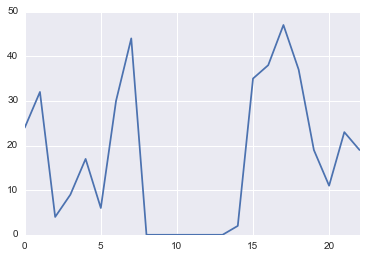

In [277]:
ax = sns.tsplot(data=uniq_heroes_month)

In [279]:
# это по сути то, что нам необходимо, но выводит все на один график, а надо на разные и красивые с нормальными подписями осей и ифной об игроке (id, login)

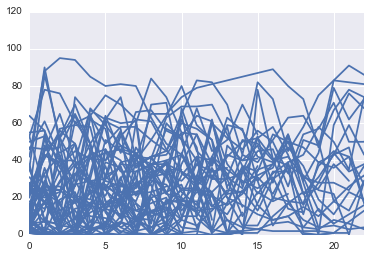

In [276]:
arr = numpy.arange(0,60)
for i in arr:
    player_match = dframe[dframe[1] == players[i]]
    uniq_heroes_month = player_match.set_index('Datetime').groupby(pd.TimeGrouper('M'))[4].apply(lambda x: len(x.unique()))
    sns.tsplot(data=uniq_heroes_month)